In [9]:
# Import
import pandas as pd
import darts
from darts import TimeSeries
from darts.models import ExponentialSmoothing, ARIMA, Prophet
import matplotlib.pyplot as plt
from darts.utils.utils import SeasonalityMode
from darts.utils.statistics import plot_acf, plot_pacf

In [2]:
# Your code goes here
df = pd.read_csv('data/0.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

In [3]:
# Too long time series not supported
df = df.head(1000)

In [4]:
# Create a TimeSeries, specifying the time and value columns
series = TimeSeries.from_dataframe(df, 'timestamp', 'value', freq='T')
# Set aside the last 36 months as a validation series
train, val = series[:-round(len(df) / 5)], series[-round(len(df) / 5):]

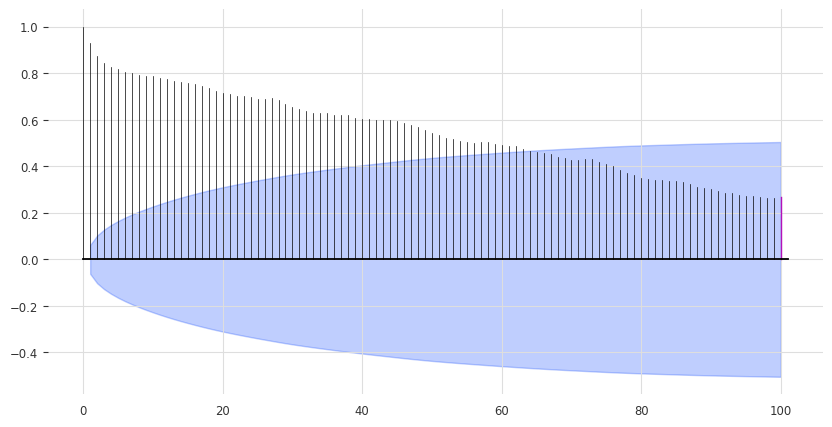

In [11]:
plot_acf(series, 100, max_lag=100)

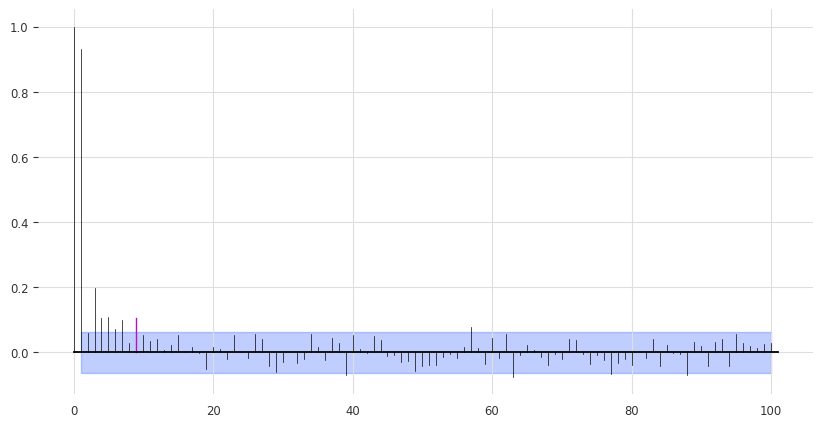

In [13]:
plot_pacf(series, 9, max_lag=100)

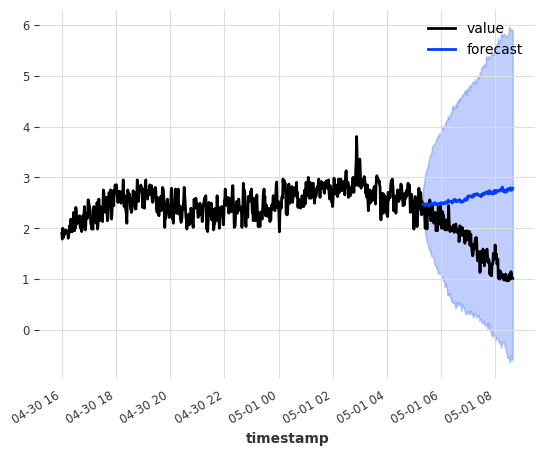

In [6]:
exp_model = ExponentialSmoothing(seasonal=SeasonalityMode.NONE)
exp_model.fit(train)
exp_prediction = exp_model.predict(len(val), num_samples=1000)
# Plotting the predictions
series.plot()
exp_prediction.plot(label='forecast', low_quantile=0.05, high_quantile=0.95)
plt.legend()

/home/madadi/anaconda3/envs/main/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/madadi/anaconda3/envs/main/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/madadi/anaconda3/envs/main/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


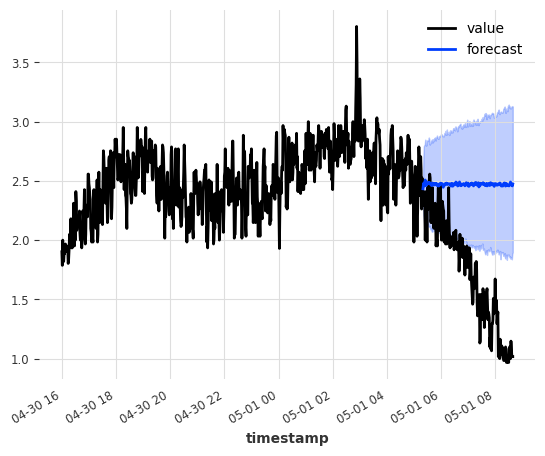

In [14]:
arima_model = ARIMA(9, 1, 5)
arima_model.fit(train)
arima_prediction = arima_model.predict(len(val), num_samples=1000)
# Plotting the predictions
series.plot()
arima_prediction.plot(label='forecast', low_quantile=0.05, high_quantile=0.95)
plt.legend()

2022-08-31 19:50:27 prophet INFO: Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
2022-08-31 19:50:27 prophet INFO: Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
2022-08-31 19:50:27 prophet INFO: Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
2022-08-31 19:50:27 cmdstanpy DEBUG: input tempfile: /tmp/tmpgty_i_a4/pvf_k6q6.json
2022-08-31 19:50:27 cmdstanpy DEBUG: input tempfile: /tmp/tmpgty_i_a4/9130gapf.json
2022-08-31 19:50:27 cmdstanpy DEBUG: idx 0
2022-08-31 19:50:27 cmdstanpy DEBUG: running CmdStan, num_threads: None
2022-08-31 19:50:27 cmdstanpy DEBUG: CmdStan args: ['/home/madadi/anaconda3/envs/main/lib/python3.10/site-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36505', 'data', 'file=/tmp/tmpgty_i_a4/pvf_k6q6.json', 'init=/tmp/tmpgty_i_a4/9130gapf.json', 'output', 'file=/tmp/tmpxkl62a22/prophet_model-20220831195027.csv', 'method=optimize',

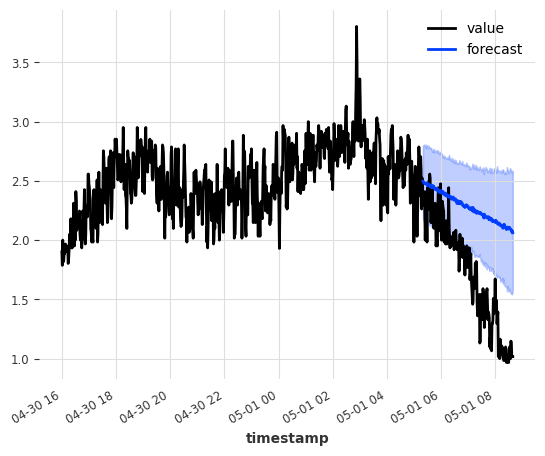

In [8]:
prophet_model = Prophet()
prophet_model.fit(train)
prophet_prediction = prophet_model.predict(len(val), num_samples=1000)
# Plotting the predictions
series.plot()
prophet_prediction.plot(label='forecast', low_quantile=0.05, high_quantile=0.95)
plt.legend()